In [ ]:
##################################### IMPORTS ##################################

In [13]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
import cv2
from google.colab.patches import cv2_imshow

#from tensorflow.keras.layers import Conv2D, MaxPoling2D

from keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


import keras
from keras.utils import to_categorical



from tensorflow.keras.applications import VGG16


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.utils import plot_model

TensoFlow Version:  2.14.0


In [ ]:
################################ drive ##############################

In [2]:
from google.colab import drive
drive.mount('/content/drive')
driveDir='/content/drive/MyDrive/DL/'


Mounted at /content/drive


In [6]:
ls=['Index_figer','palm','c','l','down','fist','thumb','palm_down','fist_move','ok_sign']

In [ ]:
############################# MODEL LOAD #######################

In [55]:

#model load
cnnModelDir=driveDir+'cnn_model_v1_4.h5'
netModelDir=driveDir+'vgg16_model_v2_1.h5'

#cnn_model = tf.keras.models.load_model(cnnModelDir)
vgg16_model = tf.keras.models.load_model(netModelDir)


In [108]:

def loadimage(img):
  x_data=[]
  img = cv2.imread(img)
  #cv2_imshow(img)
  image_fromarray = Image.fromarray(img, 'RGB')
  resize_image = image_fromarray.resize((224, 224))
  #print(resize_image)
  arr = np.array(resize_image)
  cv2_imshow(img)
  #print(resize_image)
  x_data.append(arr)
  x_data = np.array(x_data, dtype = 'float32')
  return x_data

In [109]:

def providePrediction(img):
  img=loadimage(img)
  print(img.shape)
  #pred1 = np.argmax(cnn_model.predict(img), axis = 1)
  pred2 = np.argmax(vgg16_model.predict(img), axis = 1)
  return pred2#,pred2

In [136]:
imgSrc=[driveDir+"Test/9.png",driveDir+"Test/10.png",driveDir+"Test/14.jpg"]

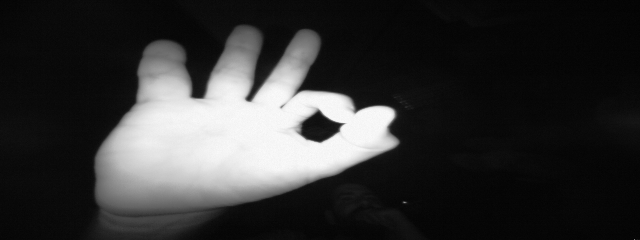

(1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
[9]
ok_sign


In [111]:
pred=providePrediction(imgSrc[0])
print(pred)
print(ls[pred[0]])

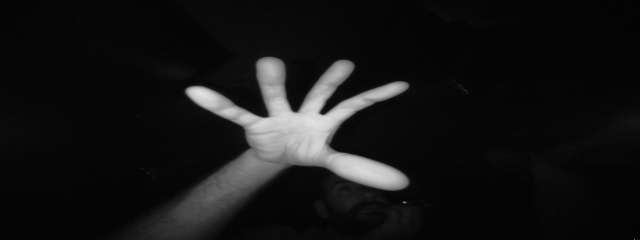

(1, 224, 224, 3)
1/1 [==============================] - 1s 883ms/step
[4]
down


In [114]:
pred=providePrediction(imgSrc[1])
print(pred)
print(ls[pred[0]])

In [140]:
!ls -l /content/drive/MyDrive/DL/Test/

total 9072
-rw------- 1 root root   58800 Oct 28 14:05 10.png
-rw------- 1 root root 4583186 Oct 28 14:21 13.jpg
-rw------- 1 root root 4585186 Oct 28 14:23 14.jpg
-rw------- 1 root root   61720 Oct 28 14:03 9.png
